# Determining xy-coordinates of pupil in image

The purpose of this study is to develop a network that can pinpoint the xy-coordinates (pixel value) of the pupil centre of an eye. The model is to be deployed using AWS and output xy-values given the image that is passed.

> **_STRETCH_**: As a stretch activity, let's also try to output the image  overlaid with a red dot that marks the xy-coorindate position of the pupil.

In [1]:
from modules import config, utils, dataset, model
from modules.model import baseline_model, final_model
from modules.dataset import get_data
from modules.config import LR, EPOCHS

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style='darkgrid')
%matplotlib inline

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

## Import & Resize Dataset

The dataset we will be using is the [gaze dataset](https://www.kaggle.com/datasets/4quant/eye-gaze) on Kaggle.

We have defined our target as `keypoints` and the data as `images`. The `images` dataset will be converted to a dataframe and saved, while the `keypoints` can be saved directly since it is imported as a dataframe.

To aid with data wrangling, we will downsample the images while still retaining enough fidelity to ensure accurate keypoint predictions.

In [2]:
# convert image to dataframe and save
dx_images = utils.get_images(save=True, result='dx')
img_array = utils.get_images(save=False, result='array')

# target dataframe and output
df_keypoints = utils.get_keypoints(with_image_locs=True, scale=True, save=True)

Getting images in <grayscale>...
Getting image locations...
Resizing images from (480, 640) to (128, 96).

Saved image dataframe to ../output/P1_imgs.parquet.

Getting images in <grayscale>...
Getting image locations...
Resizing images from (480, 640) to (128, 96).

Reading data from ../data/lpw/1/1.txt...
Reading data from ../data/lpw/1/4.txt...
Reading data from ../data/lpw/1/9.txt...
Getting image filenames...
... and add column of image filenames to keypoint DataFrame.
Reducing keypoint data from (5999)...
... to (32)

Saved keypoint dataframe to ../output/P1_kpts.parquet.



## Exploratory Data Analysis

In [3]:
# print shape
print(df_keypoints.shape)
print(dx_images.dims)
print(len(img_array))
print(len(dx_images.data_vars))

(32, 3)
Frozen({'image': 32, 'height': 96})
32
128


In [4]:
# import images from parquet (as DataFrame) and convert back to array
images = pd.read_parquet(f'{config.OUTPUT_PATH}/P1_imgs.parquet')
images = utils.df_to_array(images)

# import keypoints from parquet (as array)
keypoints = pd.read_parquet(f'{config.OUTPUT_PATH}/P1_kpts.parquet')

### Visualizations

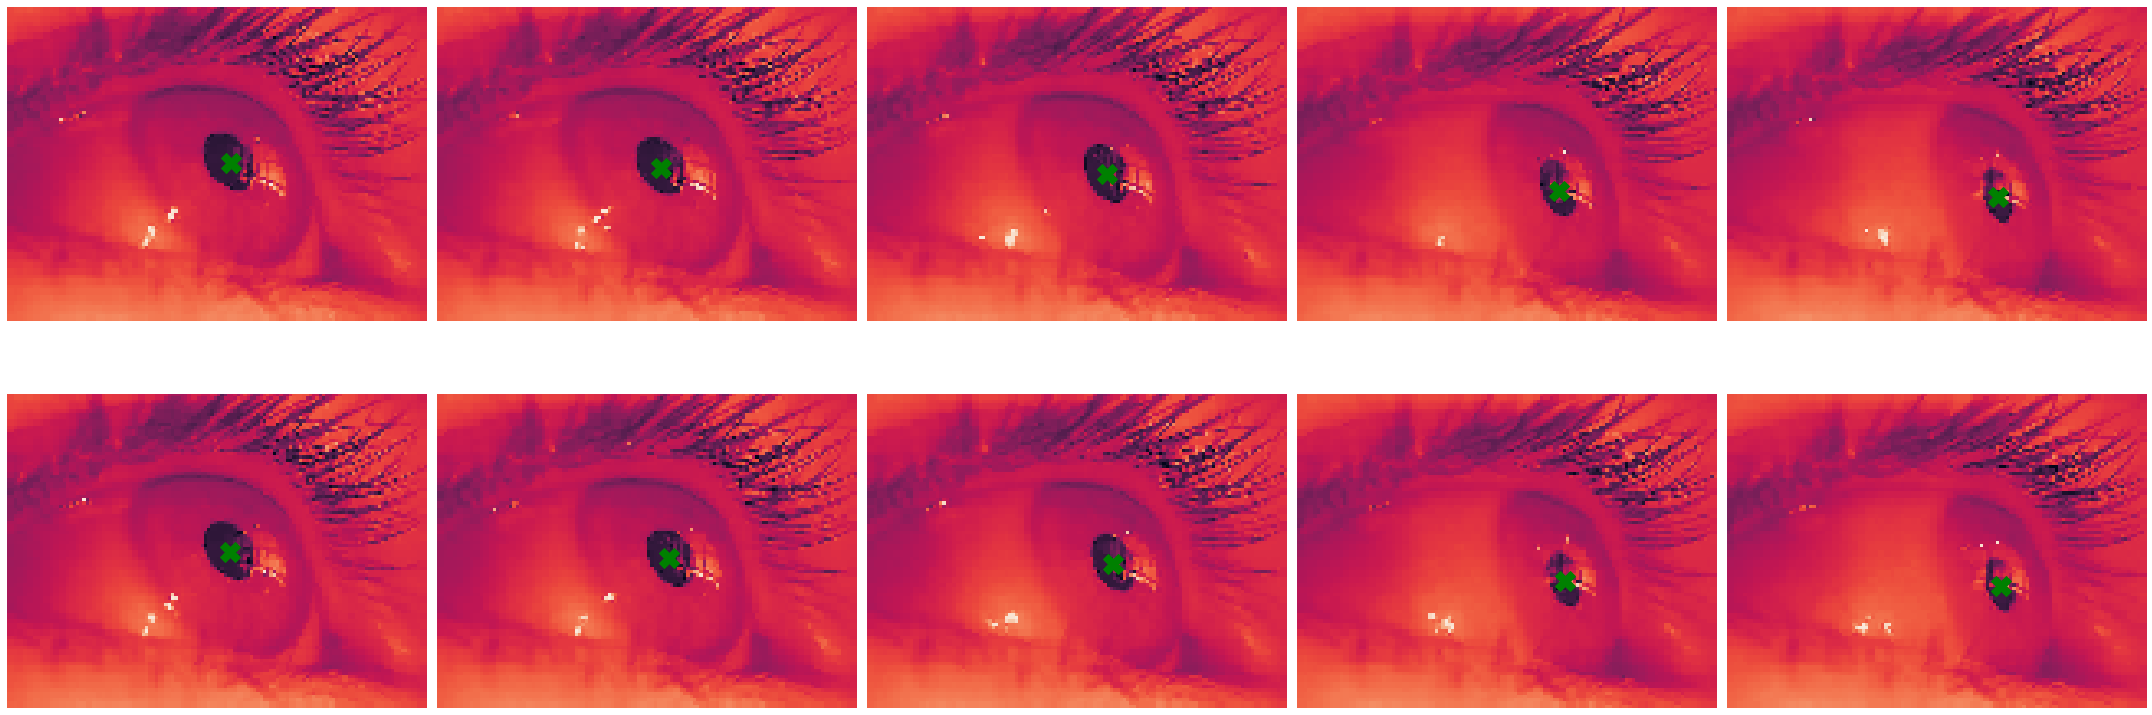

In [5]:
# plot converted sample image data along with keypoints data
utils.plot_image_keypoints(
    imgs=images[10:20],
    keypoints=keypoints[10:20],
    pivot='row')

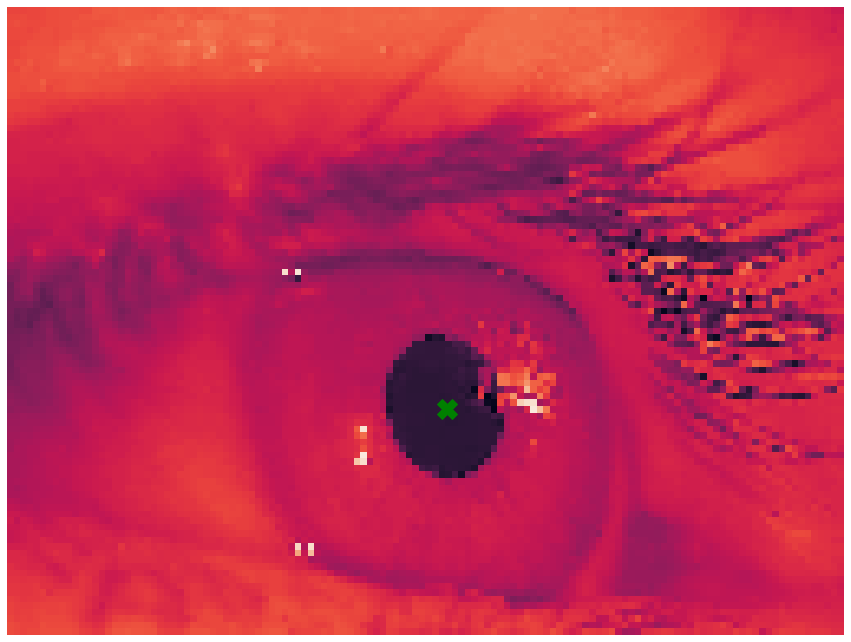

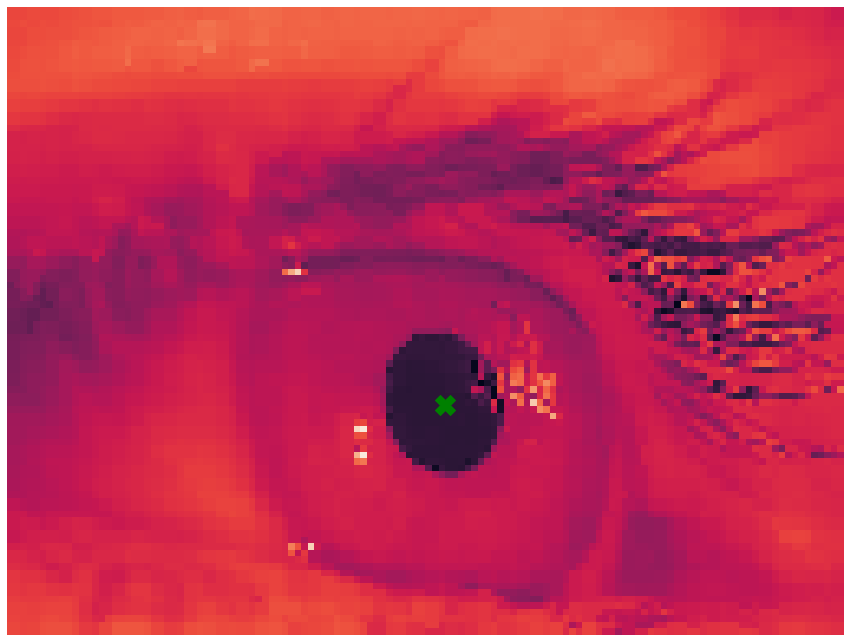

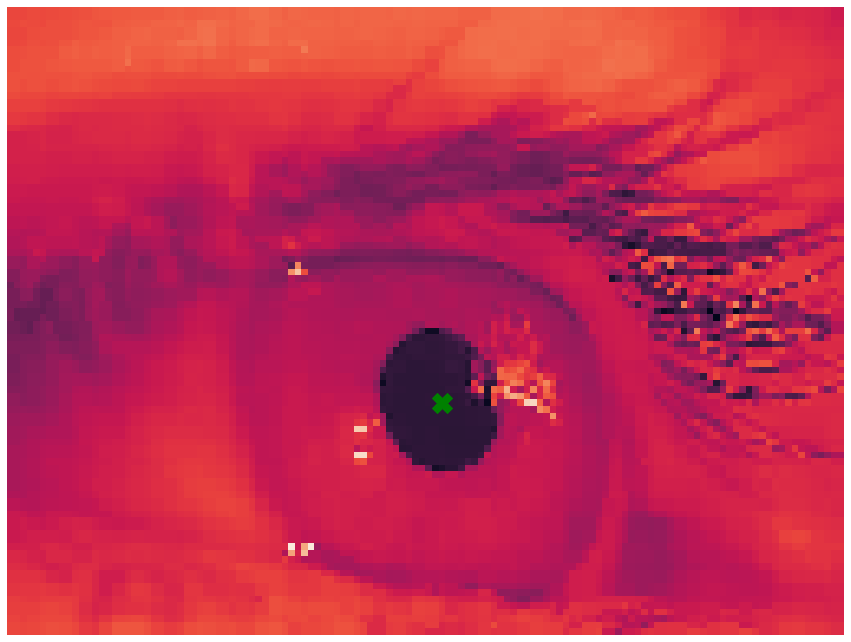

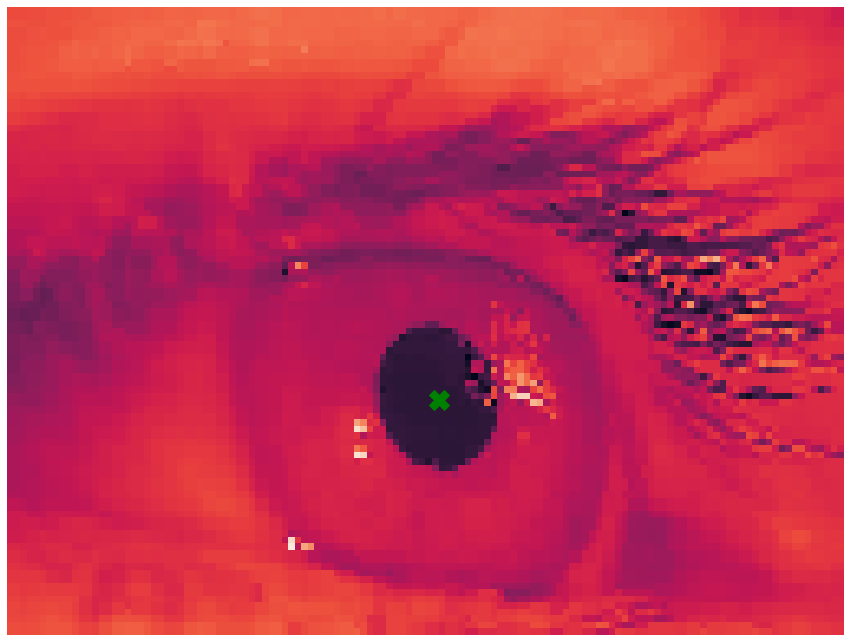

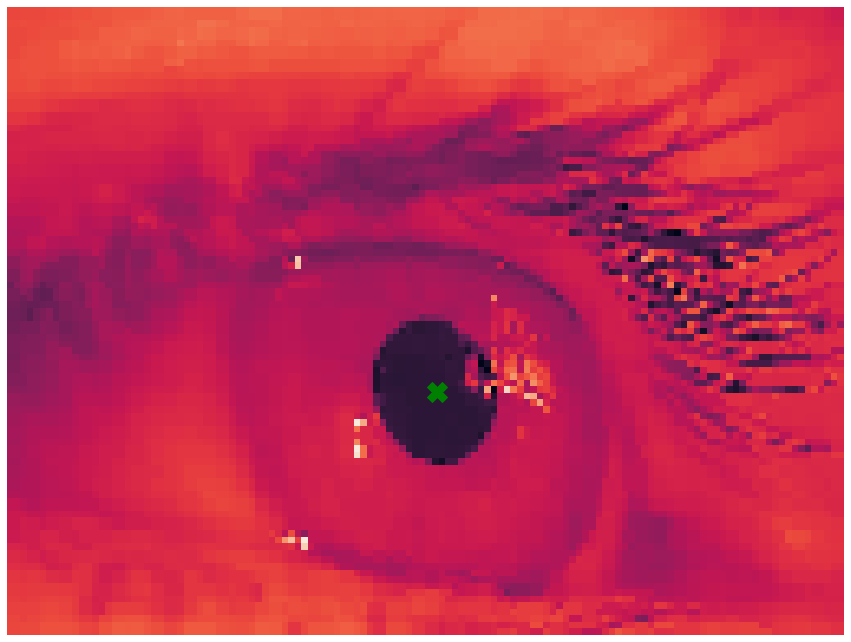

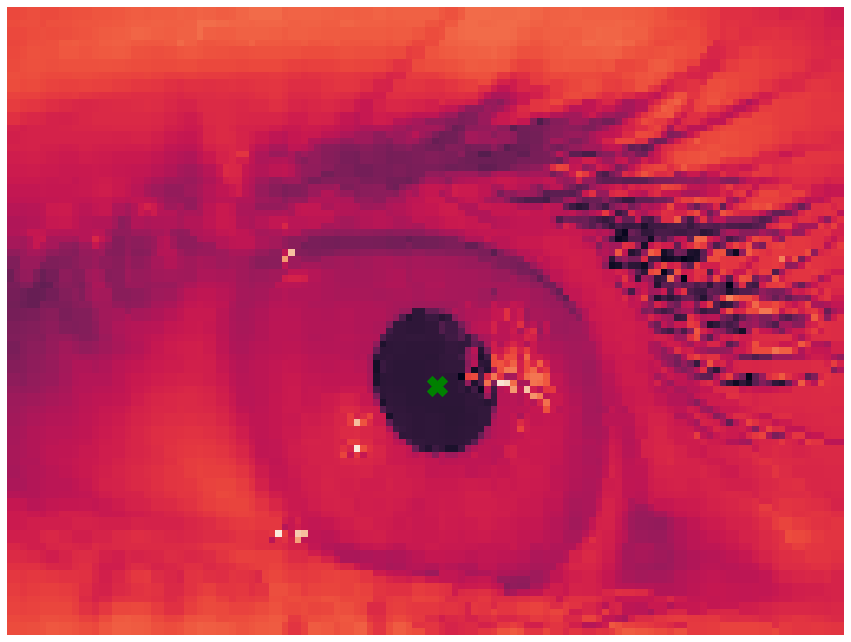

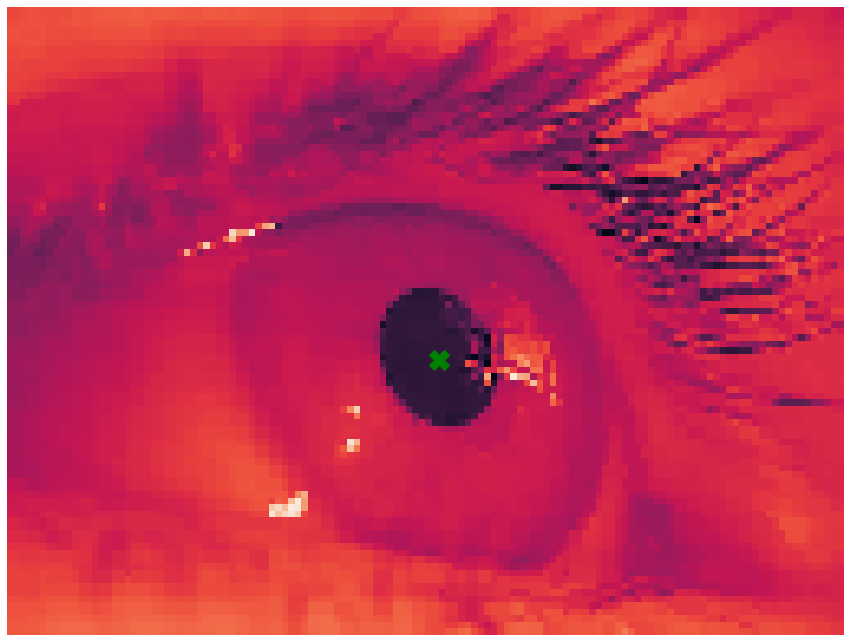

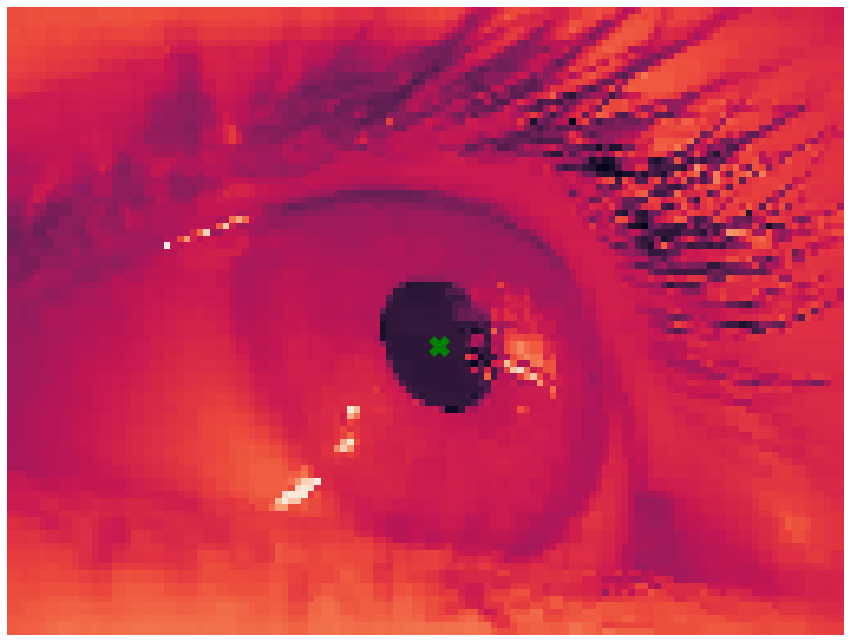

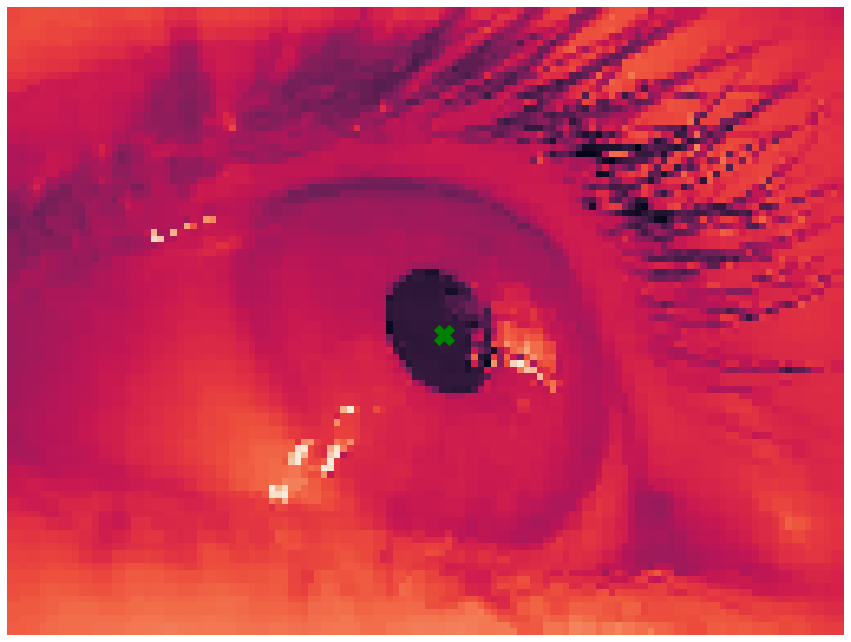

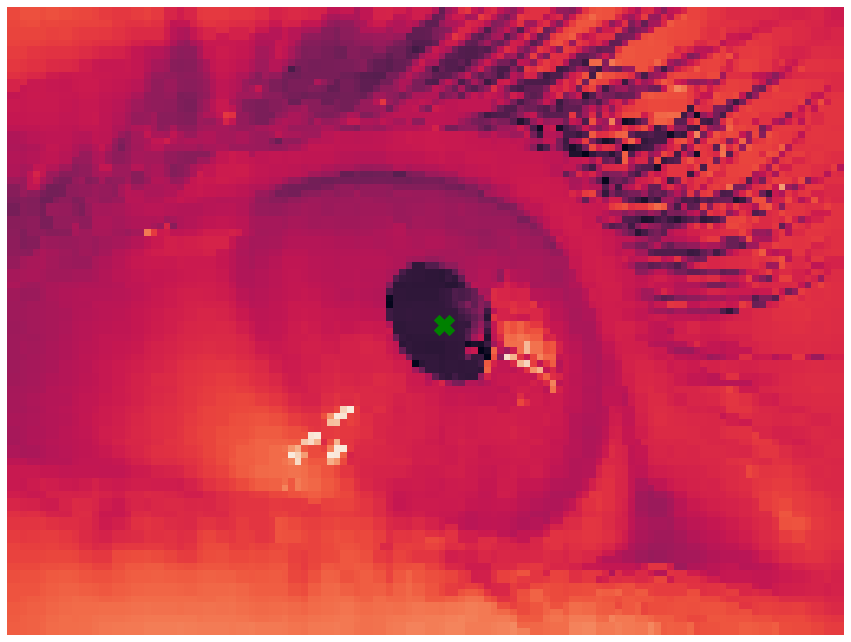

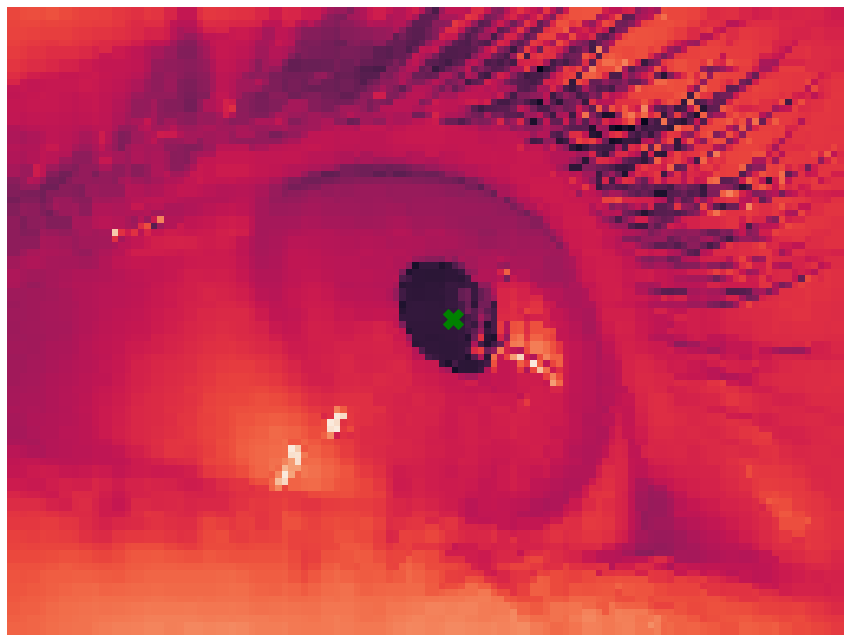

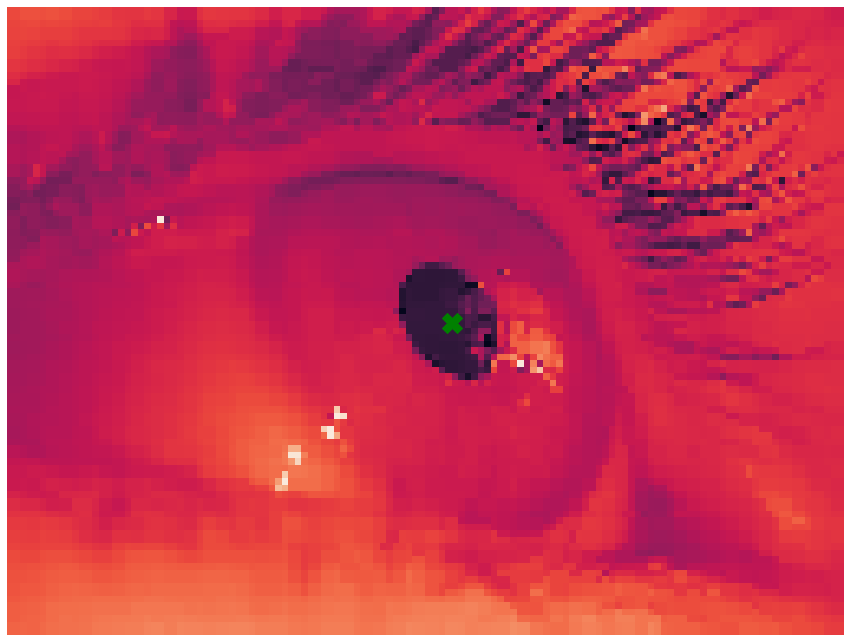

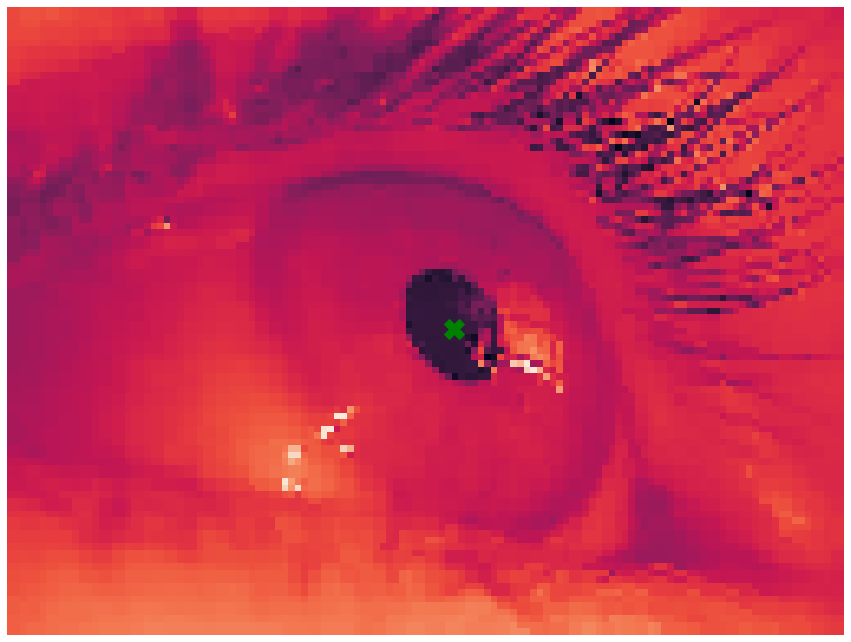

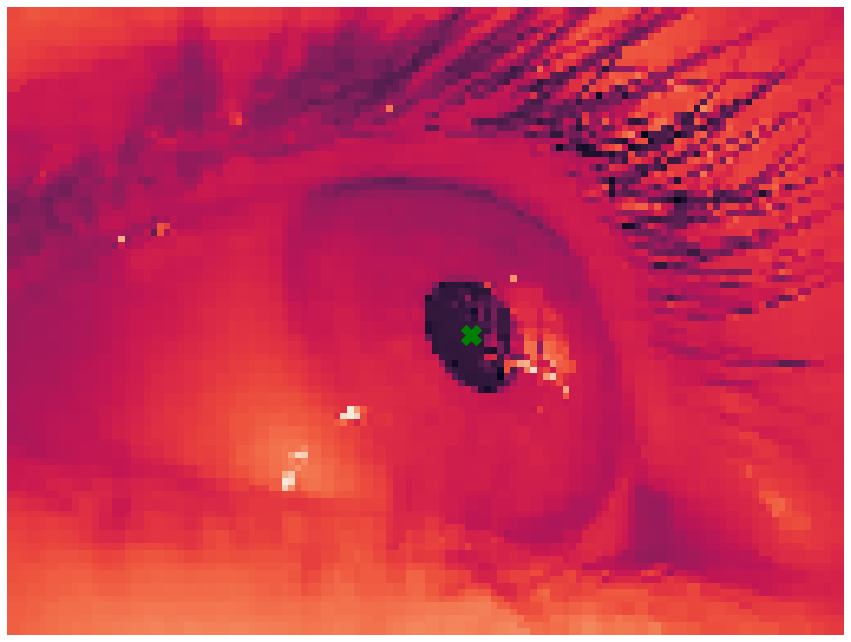

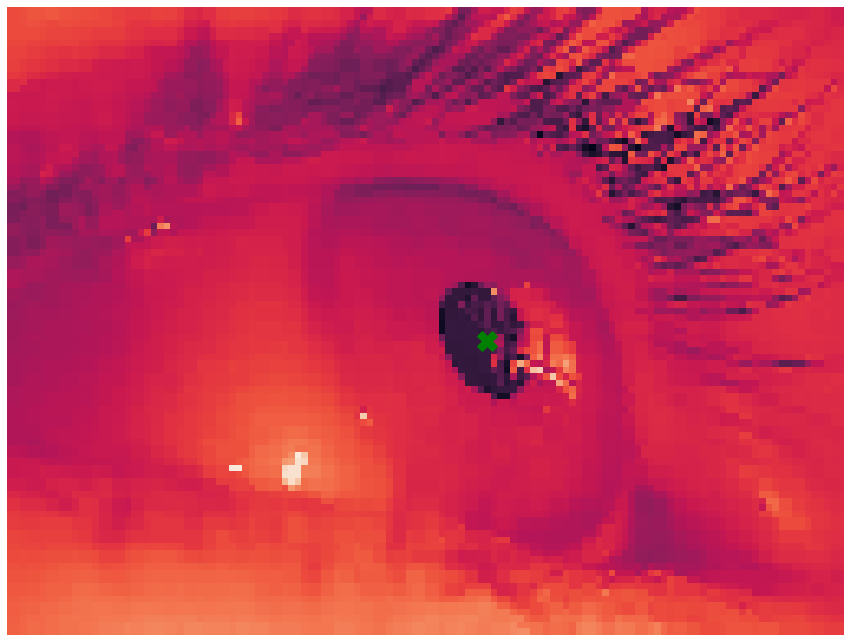

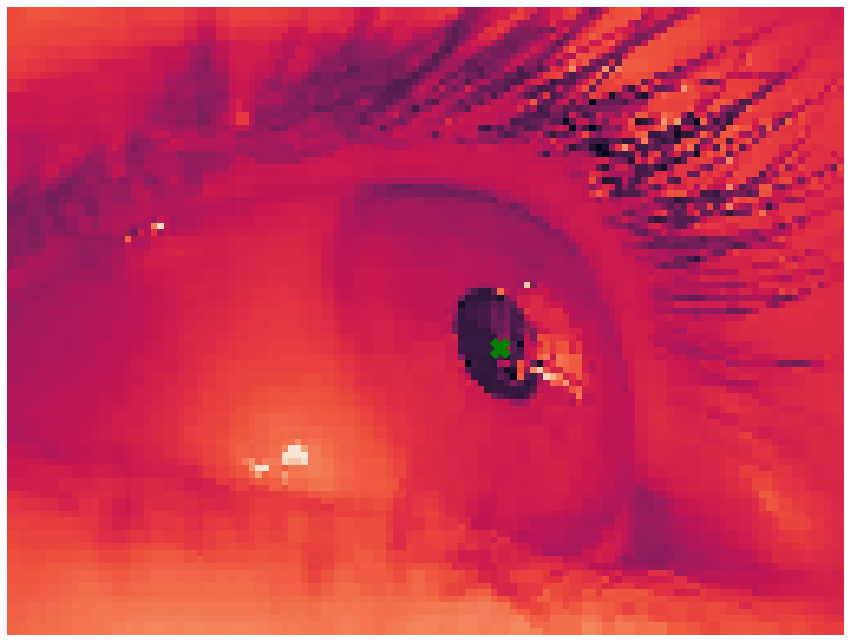

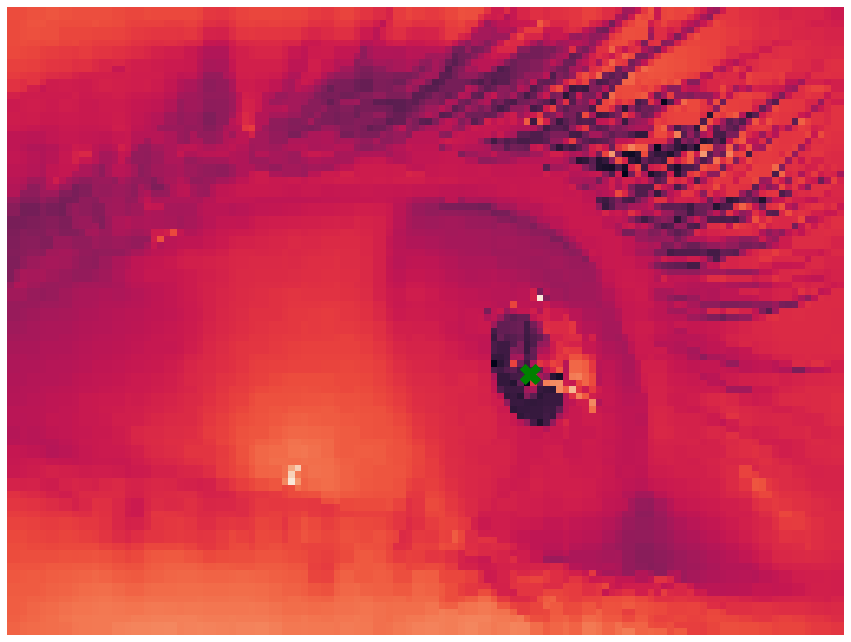

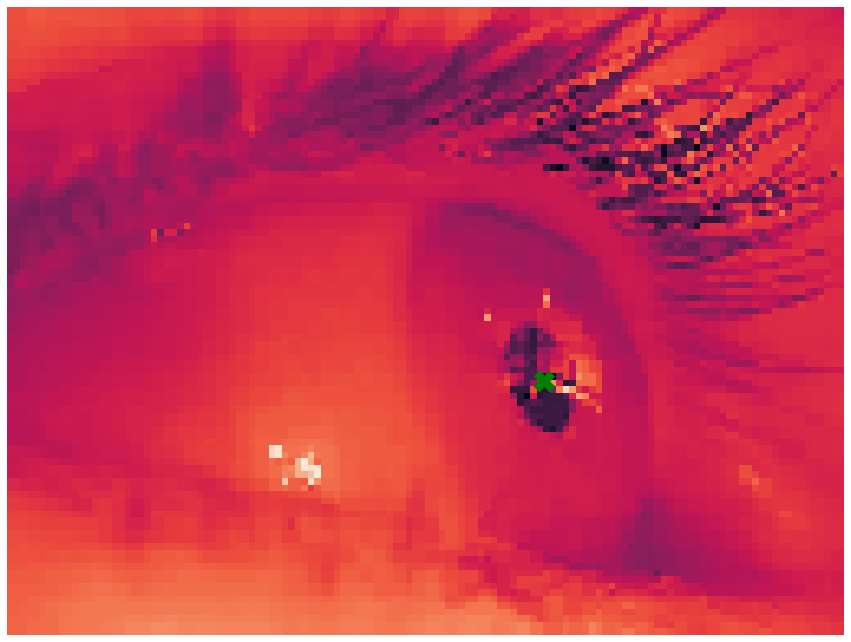

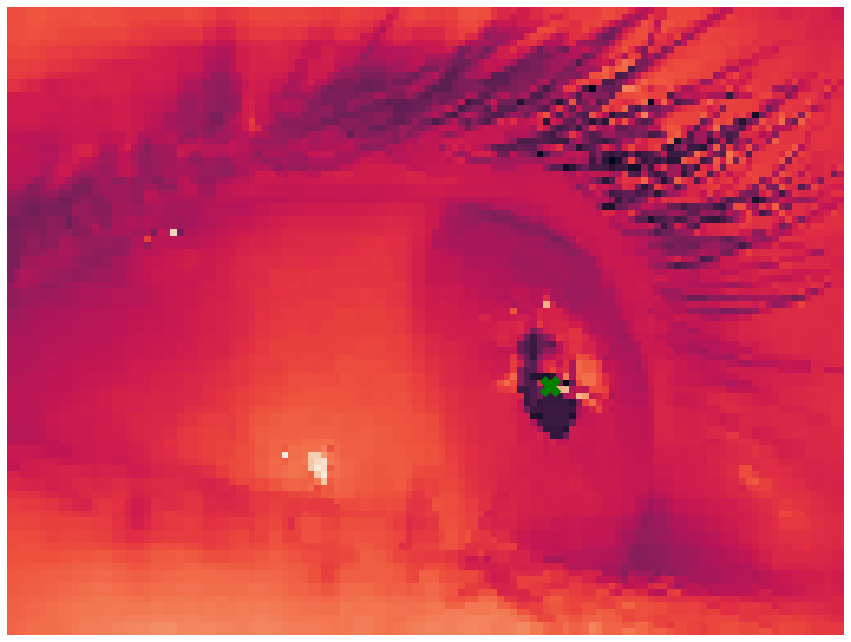

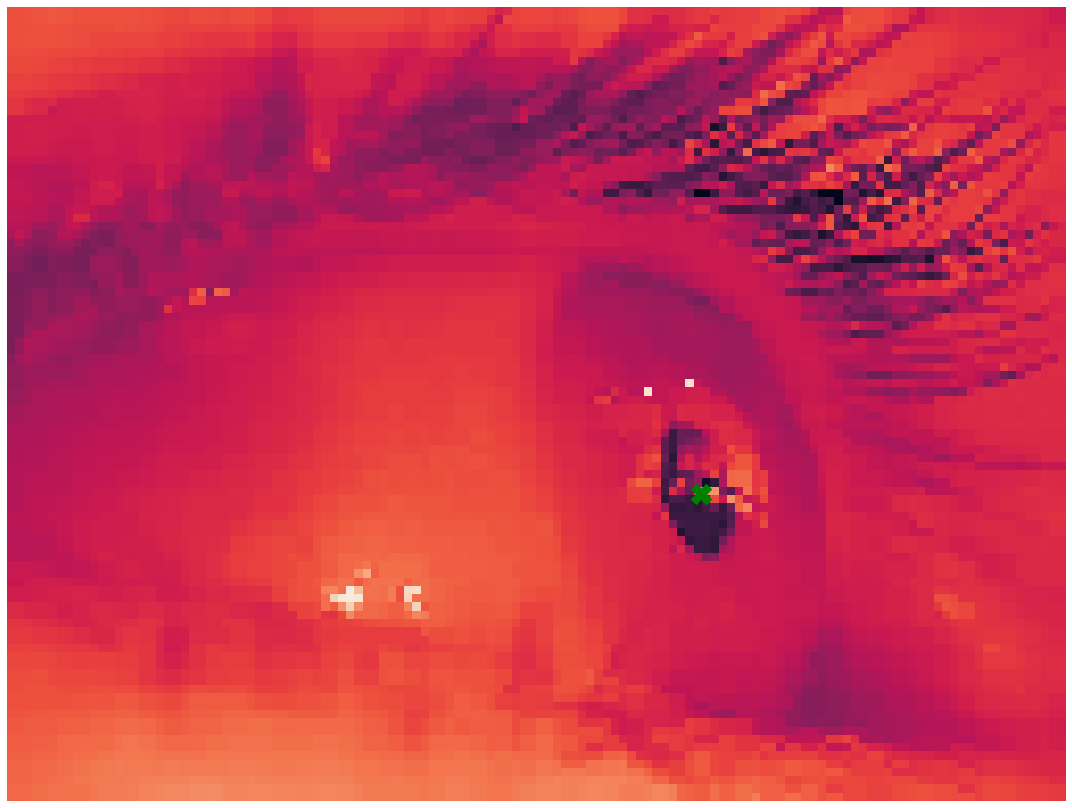

In [6]:
utils.show_image_keypoint(
    imgs=images,
    keypoints=keypoints,
    window=(0,20),
    save=True)

## Train/Test Data Split

Split 80/20 train/test respectively.

In [7]:
Xtrain, Xtest, ytrain, ytest = dataset.get_data(save=True)

Getting images in <grayscale>...
Getting image locations...
Resizing images from (480, 640) to (128, 96).

Reading data from ../data/lpw/1/1.txt...
Reading data from ../data/lpw/1/4.txt...
Reading data from ../data/lpw/1/9.txt...
Getting image filenames...
... and add column of image filenames to keypoint DataFrame.
Reducing keypoint data from (5999)...
... to (32)

SUMMARY
++++++++++
Xtrain:	25
Xtest:	7
ytrain:	25
ytest:	7

Saved Xtrain dataframe to ../output/train_val/P1_Xtrain.parquet.
Saved Xtest dataframe to ../output/train_val/P1_Xtest.parquet.
Saved ytrain dataframe to ../output/train_val/P1_ytrain.parquet.
Saved ytest dataframe to ../output/train_val/P1_ytest.parquet.


## Fit to Model

In [8]:
from PIL import Image

Getting images in <grayscale>...
Getting image locations...
Resizing images from (480, 640) to (128, 96).

Reading data from ../data/lpw/1/1.txt...
Reading data from ../data/lpw/1/4.txt...
Reading data from ../data/lpw/1/9.txt...
Getting image filenames...
... and add column of image filenames to keypoint DataFrame.
Reducing keypoint data from (5999)...
... to (32)

SUMMARY
++++++++++
Xtrain:	25
Xtest:	7
ytrain:	25
ytest:	7

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 128, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 92, 124, 64)       1664      
                                                                 
 re_lu (ReLU)                (None, 92, 124, 64)       0         
                                                                 
 max_pooling2d (MaxPooling2D

2022-06-22 21:22:59.870325: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - ETA: 0s - loss: 4540.2979

2022-06-22 21:23:00.251749: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../outputs/model/assets
1/1 [==============================] - 1s 713ms/step - loss: 4540.2979 - val_loss: 2946.4910
Epoch 2/300
1/1 [==============================] - 0s 346ms/step - loss: 3421.3792 - val_loss: 2124.9045
Epoch 3/300
1/1 [==============================] - 0s 323ms/step - loss: 2517.8042 - val_loss: 1451.3451
Epoch 4/300
1/1 [==============================] - 0s 323ms/step - loss: 1766.6997 - val_loss: 866.6885
Epoch 5/300
1/1 [==============================] - 0s 355ms/step - loss: 1101.8400 - val_loss: 417.9606
Epoch 6/300
1/1 [==============================] - 0s 368ms/step - loss: 572.0299 - val_loss: 143.4926
Epoch 7/300
1/1 [==============================] - 0s 381ms/step - loss: 218.0320 - val_loss: 72.4020
Epoch 8/300
1/1 [==============================] - 0s 54ms/step - loss: 71.1120 - val_loss: 200.9812
Epoch 9/300
1/1 [==============================] - 0s 53ms/step - loss: 134.8718 - val_loss: 413.7486
Epoch 10/300
1/1 [====

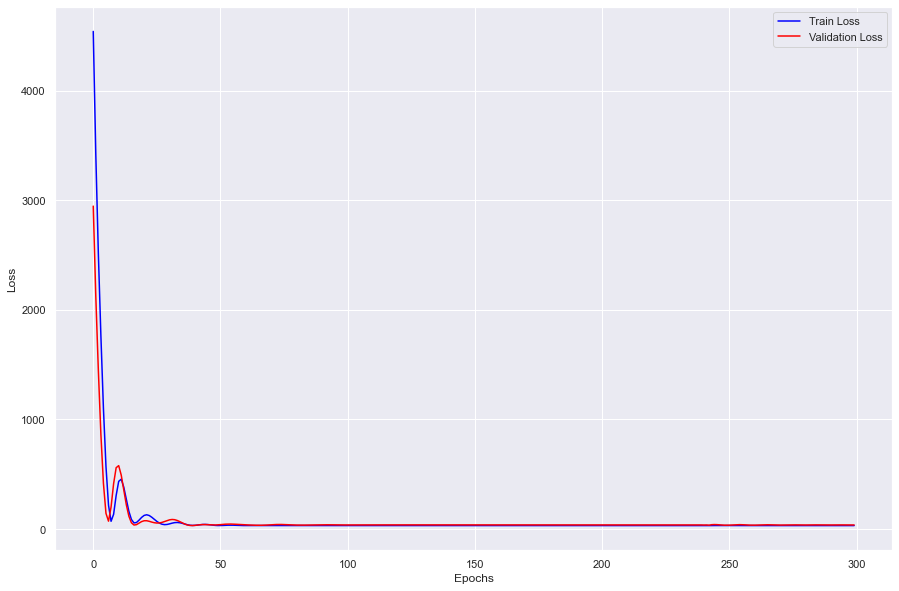

In [9]:
# save model at given checkpoints
model_checkpoint = ModelCheckpoint(
    filepath='../outputs/model',
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

# load training and validation data
Xtrain, Xtest, ytrain, ytest = get_data(save=False)

Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

# build and compile the model
model = baseline_model()
print(model.summary())

model.compile(
    optimizer=Adam(learning_rate=LR),
    loss=MeanSquaredError())

# train model
history = model.fit(
    Xtrain, ytrain,
    validation_data=(Xtest, ytest),
    epochs=EPOCHS,
    callbacks=[model_checkpoint],
    workers=4, 
    use_multiprocessing=True)

# plot and save history
utils.save_loss_plots(history)

In [10]:
# save model at given checkpoints
model_checkpoint = ModelCheckpoint(
    filepath='../outputs/model',
    monitor='val_loss',
    mode='auto',
    save_best_only=True)

# load training and validation data
Xtrain, Xtest, ytrain, ytest = get_data(save=False)

# convert X data to DataFrame
Xtrain = utils.array_to_df(Xtrain)
Xtest = utils.array_to_df(Xtest)
print(Xtrain)
print(Xtest)

# build and compile the model
model = baseline_model()
print(model.summary())
    
# group by image, use resulting data to train model
storage = {}
for (train_img,train_data),(test_img,test_data) in zip(Xtrain.groupby('image'), Xtest.groupby('image')):
    print(f'{train_img},\n{train_data},\n{test_img},\n{test_data}')
    # compile model
    model.compile(
        optimizer=Adam(learning_rate=LR),
        loss=MeanSquaredError())
    # train model
    storage[train_img] = model.fit(
        train_data, ytrain,
        validation_data=(test_data, ytest),
        epochs=EPOCHS,
        callbacks=[model_checkpoint],
        workers=4, 
        use_multiprocessing=True)

    # plot and save history
    utils.save_loss_plots(storage[train_img])

Getting images in <grayscale>...
Getting image locations...
Resizing images from (480, 640) to (128, 96).

Reading data from ../data/lpw/1/1.txt...
Reading data from ../data/lpw/1/4.txt...
Reading data from ../data/lpw/1/9.txt...
Getting image filenames...
... and add column of image filenames to keypoint DataFrame.
Reducing keypoint data from (5999)...
... to (32)

SUMMARY
++++++++++
Xtrain:	25
Xtest:	7
ytrain:	25
ytest:	7

width         0    1    2    3    4    5    6    7    8    9    ...  118  119  \
image height                                                    ...             
0     0       160  160  161  162  162  161  161  161  162  162  ...  139  139   
      1       160  160  161  162  162  161  161  161  162  162  ...  139  139   
      2       161  161  163  163  163  162  163  163  164  164  ...  143  143   
      3       162  162  162  161  161  163  164  164  164  164  ...  147  147   
      4       162  162  162  161  161  163  164  164  164  164  ...  147  147   
... 

ValueError: Data cardinality is ambiguous:
  x sizes: 96
  y sizes: 25
Make sure all arrays contain the same number of samples.

In [ ]:
ytest

,x,y
25,81.60,68.400
31,60.28,54.800
19,83.37,58.392
3,65.60,59.560
2,66.04,60.080
29,72.72,60.080
18,82.48,57.480
